### Projeto - Análise e predição de desempenho de alunos para seu próximo emprego.

In [1]:
# Datas e Horas
from datetime import datetime

# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-Processamento
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Processamento ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação de Desempenho
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


ModuleNotFoundError: No module named 'numpy'

In [47]:
# Lendo dataset
dt = pd.read_csv('campus.csv')

# Primeiras linhas
dt.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [48]:
# Descrição
dt.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [49]:
# Avaliando dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [50]:
dt.shape

(215, 15)

In [51]:
dt.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [52]:
dt['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [53]:
dt['status'].isna().sum()


0

In [54]:
dt['salary'].isna().sum()

67

##### Otimizando o dataset

In [5]:
dt.memory_usage(deep=True)

Index               132
sl_no              1720
gender            12470
ssc_p              1720
ssc_b             13661
hsc_p              1720
hsc_b             13629
hsc_s             13840
degree_p           1720
degree_t          14098
workex            12759
etest_p            1720
specialisation    13665
mba_p              1720
status            13813
salary             1720
dtype: int64

In [6]:
# Converter coluna Gender
dt['gender'] = dt.gender.astype('category')

In [7]:
# Verificando
dt.memory_usage(deep=True)

Index               132
sl_no              1720
gender              439
ssc_p              1720
ssc_b             13661
hsc_p              1720
hsc_b             13629
hsc_s             13840
degree_p           1720
degree_t          14098
workex            12759
etest_p            1720
specialisation    13665
mba_p              1720
status            13813
salary             1720
dtype: int64

In [8]:
#Drop the sl_no becuase it is ir-relavent and no use.
#dt.drop('sl_no',axis=1,inplace=True)

##### OBS: Ao alterar o tipo de dado para 'Category', pudemos ver que há uma otimização no consumo de memória. Irei realizar o mesmo procedimento nas demais colunas.

In [9]:
cat_cols = [col for col in dt.columns if dt[col].dtype=='O']
cat_cols

['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [10]:
for col in cat_cols:
    print(dt[col].unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [11]:
for col in cat_cols:
    dt[col] = dt[col].astype('category')

In [12]:
dt.memory_usage(deep=True)

Index              132
sl_no             1720
gender             439
ssc_p             1720
ssc_b              450
hsc_p             1720
hsc_b              450
hsc_s              513
degree_p          1720
degree_t           517
workex             442
etest_p           1720
specialisation     450
mba_p             1720
status             453
salary            1720
dtype: int64

#### O consumo de memória melhor bastante

#### Analisando os Missings

In [13]:
# Duplicados
dt.duplicated().sum()

0

In [14]:
# Valores nulos
dt.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [15]:
# substituindo os valores NaN por 0 na coluna 'Salary'
dt['salary'] = dt['salary'].fillna(0)
dt

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [16]:
dt.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [17]:
# Substituindo NaN por 0 na coluna Salário
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Análise Exploratória de Dados

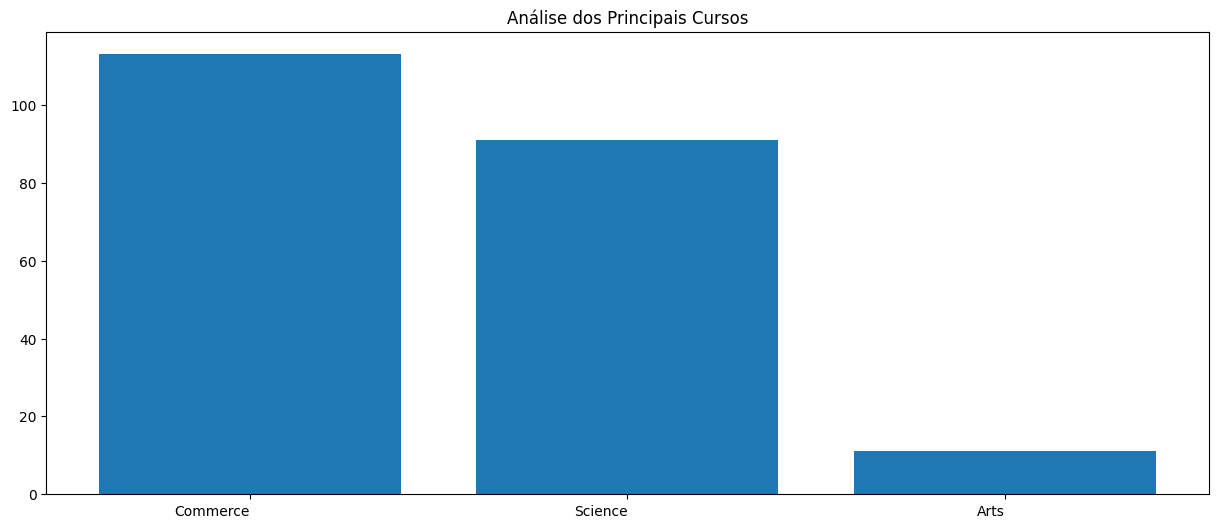

In [18]:
# Gráficos de Análise dos Setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Principais Cursos')
plt.bar(dt['hsc_s'].value_counts().index, dt['hsc_s'].value_counts());
plt.xticks(ha='right');

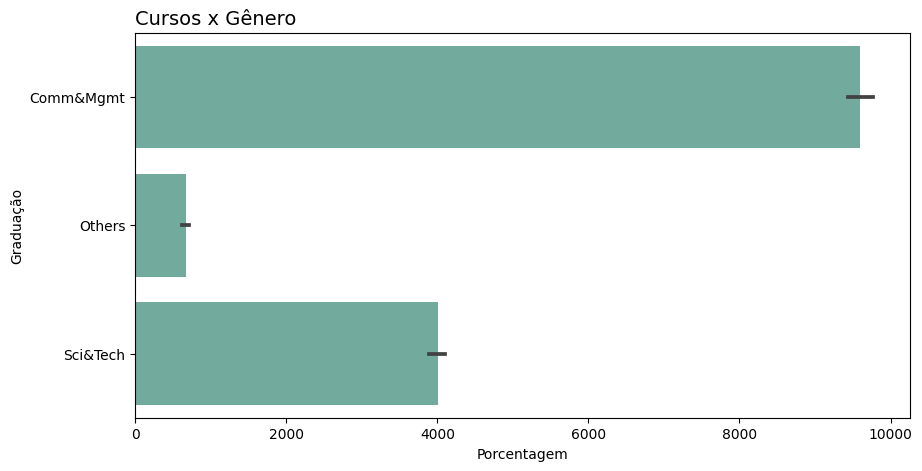

In [19]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('Cursos x Gênero', loc='left', fontsize=14 )

# Grafico
sns.barplot( data=dt, x='degree_p', y='degree_t',color='#69b3a2', estimator=sum )

# Label
plt.ylabel('Graduação');
plt.xlabel('Porcentagem');

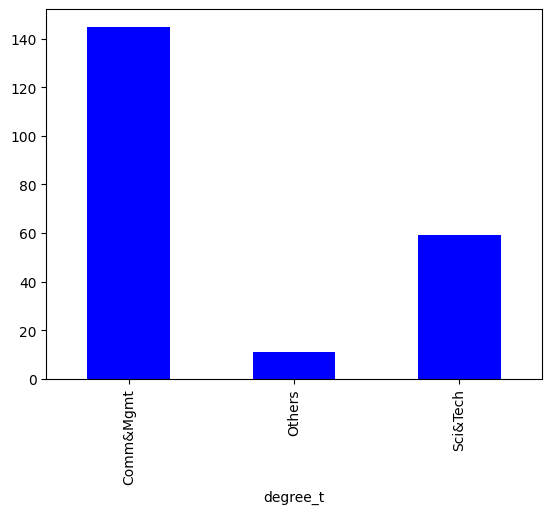

In [20]:
dt.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'blue')
plt.show()

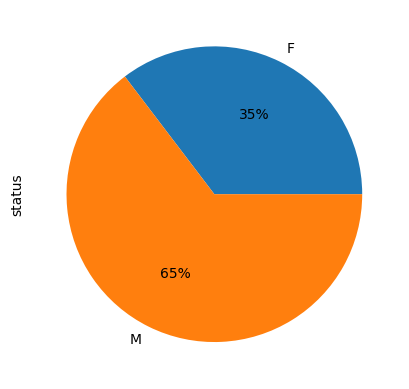

In [21]:
dt.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%')
plt.show()

### Modelagem de Dados

In [22]:
y = dt.specialisation
features = ['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'status', 'mba_p' ]

X = dt[features]

X.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [23]:
from sklearn.preprocessing import LabelEncoder

features = ['gender', 'ssc_b', 'hsc_b', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'status', 'workex', 'etest_p', 'specialisation', 'mba_p' ]

label_encoder = LabelEncoder()
for col in features:
    dt[col] = label_encoder.fit_transform(dt[col])

dt.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,46,1,93,1,1,14,2,0,9,1,64,1,270000.0
1,2,1,82,0,79,1,2,74,2,1,74,0,153,1,200000.0
2,3,1,42,0,51,0,0,27,0,0,55,0,50,1,250000.0
3,4,1,22,0,14,0,2,3,2,0,37,1,72,0,0.0
4,5,1,98,0,70,0,1,65,0,0,96,0,28,1,425000.0
5,6,1,19,1,10,1,2,43,2,1,9,0,3,0,0.0
6,7,0,5,1,9,1,1,81,0,0,53,0,11,0,0.0
7,8,1,89,0,37,0,2,38,2,1,38,0,103,1,252000.0
8,9,1,61,0,81,0,1,60,0,0,84,0,95,1,231000.0
9,10,1,25,0,55,0,1,20,0,0,7,0,4,0,0.0


In [24]:
# Removendo dados desncessários
one_hot_encodeding_of_data = pd.get_dummies(dt, columns = ['hsc_s', 'degree_t'])

data = one_hot_encodeding_of_data.copy()

data.drop(['sl_no'],axis=1, inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2
0,1,46,1,93,1,14,0,9,1,64,1,270000.0,False,True,False,False,False,True
1,1,82,0,79,1,74,1,74,0,153,1,200000.0,False,False,True,False,False,True
2,1,42,0,51,0,27,0,55,0,50,1,250000.0,True,False,False,True,False,False
3,1,22,0,14,0,3,0,37,1,72,0,0.0,False,False,True,False,False,True
4,1,98,0,70,0,65,0,96,0,28,1,425000.0,False,True,False,True,False,False


In [25]:
# criar um dicionário de substituição
status_map = {'Not Placed': 0, 'Placed': 1}

# substituir os valores usando a função map
dt['status'] = dt['status'].map(status_map)
# converter a coluna status para tipo float
dt['status'] = dt['status'].astype('float32')

dt['status'] = dt['status'].fillna(0)

dt

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,46,1,93,1,1,14,2,0,9,1,64,0.0,270000.0
1,2,1,82,0,79,1,2,74,2,1,74,0,153,0.0,200000.0
2,3,1,42,0,51,0,0,27,0,0,55,0,50,0.0,250000.0
3,4,1,22,0,14,0,2,3,2,0,37,1,72,0.0,0.0
4,5,1,98,0,70,0,1,65,0,0,96,0,28,0.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,85,1,84,1,1,76,0,0,83,0,199,0.0,400000.0
211,212,1,25,1,24,1,2,60,2,0,52,0,14,0.0,275000.0
212,213,1,46,1,49,1,1,64,0,1,25,0,179,0.0,295000.0
213,214,0,64,1,45,1,1,14,0,0,45,1,81,0.0,204000.0


In [26]:
# verificar se a coluna Salary tem valores NaN
print(dt['status'].isna().sum())
print(dt['salary'].isna().sum())


0
0


<Axes: >

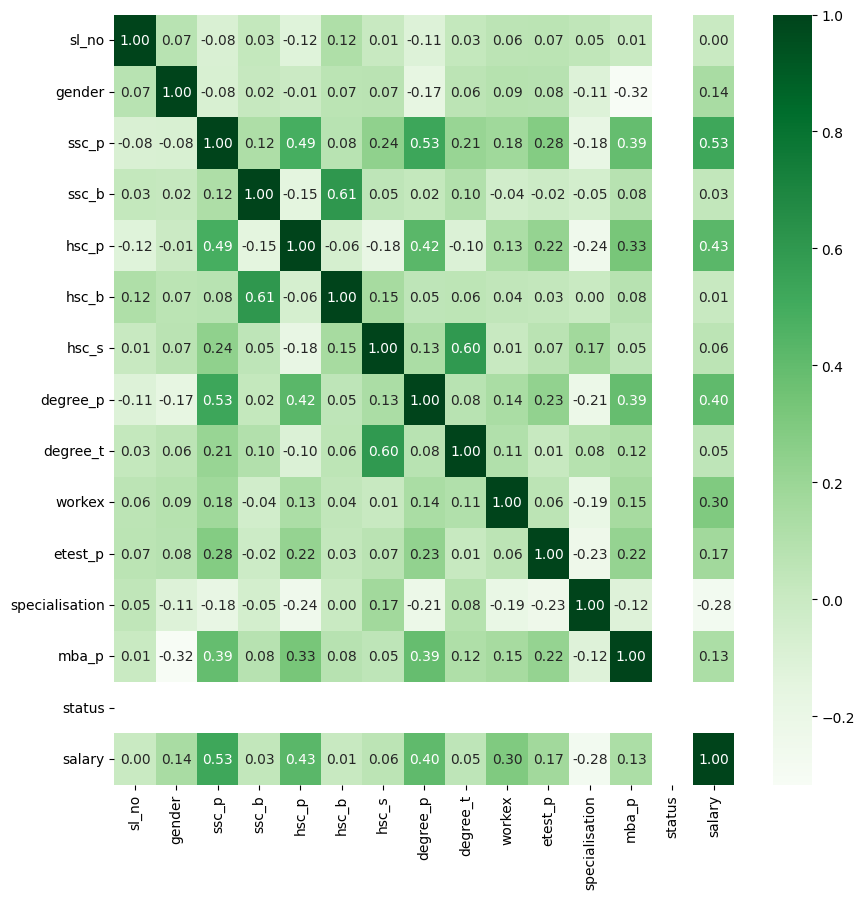

In [27]:

#co-relation
corr=dt.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Greens')

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

# definir as variáveis dependentes e independentes
X = dt.drop(['status', 'salary'], axis=1)
y = dt['status']

# dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# exibir o tamanho dos datasets de treino e teste
print("Número de amostras do conjunto de treinamento:", len(X_train))
print("Número de amostras do conjunto de teste:", len(X_test))

Número de amostras do conjunto de treinamento: 150
Número de amostras do conjunto de teste: 65


In [29]:
# instanciar o modelo de classificação
modelo = DecisionTreeClassifier()

# treinar o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# realizar predições no conjunto de testes
y_pred = modelo.predict(X_test)

# avaliar o desempenho do modelo
acc = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acc)

Acurácia do modelo: 1.0
